## Problem Statement


Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered


CTR depends on multiple factors like design, content, personalization, etc. 


How do you design the email content effectively?
What should your subject line look like?
What should be the length of the email?
Do you need images in your email template?

As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.

## Table of Content


* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Exploratory Data Analysis__

* __Step 4 : Splitting the data__
  
* __Step 5 : Choosing the correct model__

* __Step 6 : Building the Model__

* __Step 7 : Predicting the data__

* __Step 8 : Improving the Model Performance__

* __Step 9 : Submission__






### Step 1: Importing the Relevant Libraries


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [24]:
train = pd.read_csv("train_F3fUq2S.csv")
test = pd.read_csv("test_Bk2wfZ3.csv")

In [25]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [26]:
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [27]:
train.shape, test.shape

((1888, 22), (762, 21))

* __We have 1888 rows and 22 columns in Train set whereas Test set has 762 rows and 21 columns.__

In [28]:
# Checking the Missing values
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [29]:
test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

*  __There are no missing values in both Train and Test datasets__

### Step 3: Exploratory Data Analysis

In [30]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


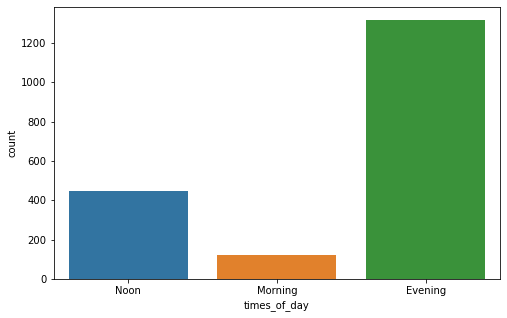

In [31]:
plt.figure(figsize=(8,5))
sns.countplot("times_of_day",data=train);

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

__There is only one column with Object Dtype__

__So Conveting that column into numeric Dtype using LabelEncoder__

# Label Encoding

In [33]:
le = LabelEncoder()
train["times_of_day"] = le.fit_transform(train["times_of_day"])
test["times_of_day"] = le.fit_transform(test["times_of_day"])

In [34]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


### Step 4: Splitting the data

In [363]:
# Initaialize the data
X = train.iloc[:,1:21]
y = train.iloc[:,-1]


## Train_test_split for Spliting the data

In [425]:
# 20% of the data is split into valid dataset
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

### Step 5 : Choose the correct model

__ML Models__

In [369]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [370]:
models = [LinearRegression(),  SVR(), RandomForestRegressor(),
          KNeighborsRegressor(), DecisionTreeRegressor()]
names = ['Linear Regression', 'SVR', 'RandomForestRegressor',
         'K Neighbors Regressor', 'Decision Tree Regressor']
model_list=[]

In [371]:
for i in models:
    model = i
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    model_list.append(metrics.r2_score(y_valid,y_pred))
   

In [372]:
pd.DataFrame({"Models":names, "R2_score":model_list})

,Models,R2_score
0,Linear Regression,0.122130
1,SVR,-0.452349
2,RandomForestRegressor,0.468862
3,K Neighbors Regressor,0.249348
4,Decision Tree Regressor,-0.059214


__From the above table we can clearly see the RandomForestRegressor is Performing well compared to Others models__

### Step 6: Building the Model


# RandomForestRegressor

In [426]:
#RandomForestRegressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_valid)
y_pred[:10]

array([0.01144664, 0.0621672 , 0.09062198, 0.03208593, 0.06402895,
       0.09783904, 0.04875227, 0.02563383, 0.01011839, 0.01363037])

In [427]:
np.array(y_valid[:10])

array([0.00331748, 0.05      , 0.01044725, 0.03008299, 0.0306982 ,
       0.12714509, 0.05253623, 0.01784636, 0.00793437, 0.02240041])

### Step 7: Predicting Model


In [428]:
# Predicting through R2_Score
metrics.r2_score(y_valid,y_pred)

0.47624591608375455

### Step 8: Improving the performance of model

In [429]:
reg.feature_importances_

array([5.92466375e-03, 8.56185348e-02, 2.87195614e-01, 1.24680201e-01,
       3.84687279e-02, 1.09586907e-02, 1.66790395e-02, 4.78021726e-02,
       5.93372072e-02, 1.09363764e-01, 1.25788033e-01, 2.51175888e-02,
       3.40739096e-03, 2.65398833e-02, 0.00000000e+00, 2.00184772e-03,
       2.96552218e-05, 3.03506843e-06, 1.10480317e-03, 2.99791468e-02])

In [430]:
coef = pd.DataFrame(reg.feature_importances_,columns=["Coefficients"])
Col = pd.DataFrame(X.columns,columns=["Columns_names"])
Res = pd.concat([Col,coef],axis=1)
Res = Res.sort_values("Coefficients",ascending=False)
Res

,Columns_names,Coefficients
2,body_len,0.287196
10,mean_CTA_len,0.125788
3,mean_paragraph_len,0.124680
9,no_of_CTA,0.109364
1,subject_len,0.085619
8,product,0.059337
7,category,0.047802
4,day_of_week,0.038469
19,target_audience,0.029979
13,is_quote,0.026540


<AxesSubplot:xlabel='Columns_names', ylabel='Coefficients'>

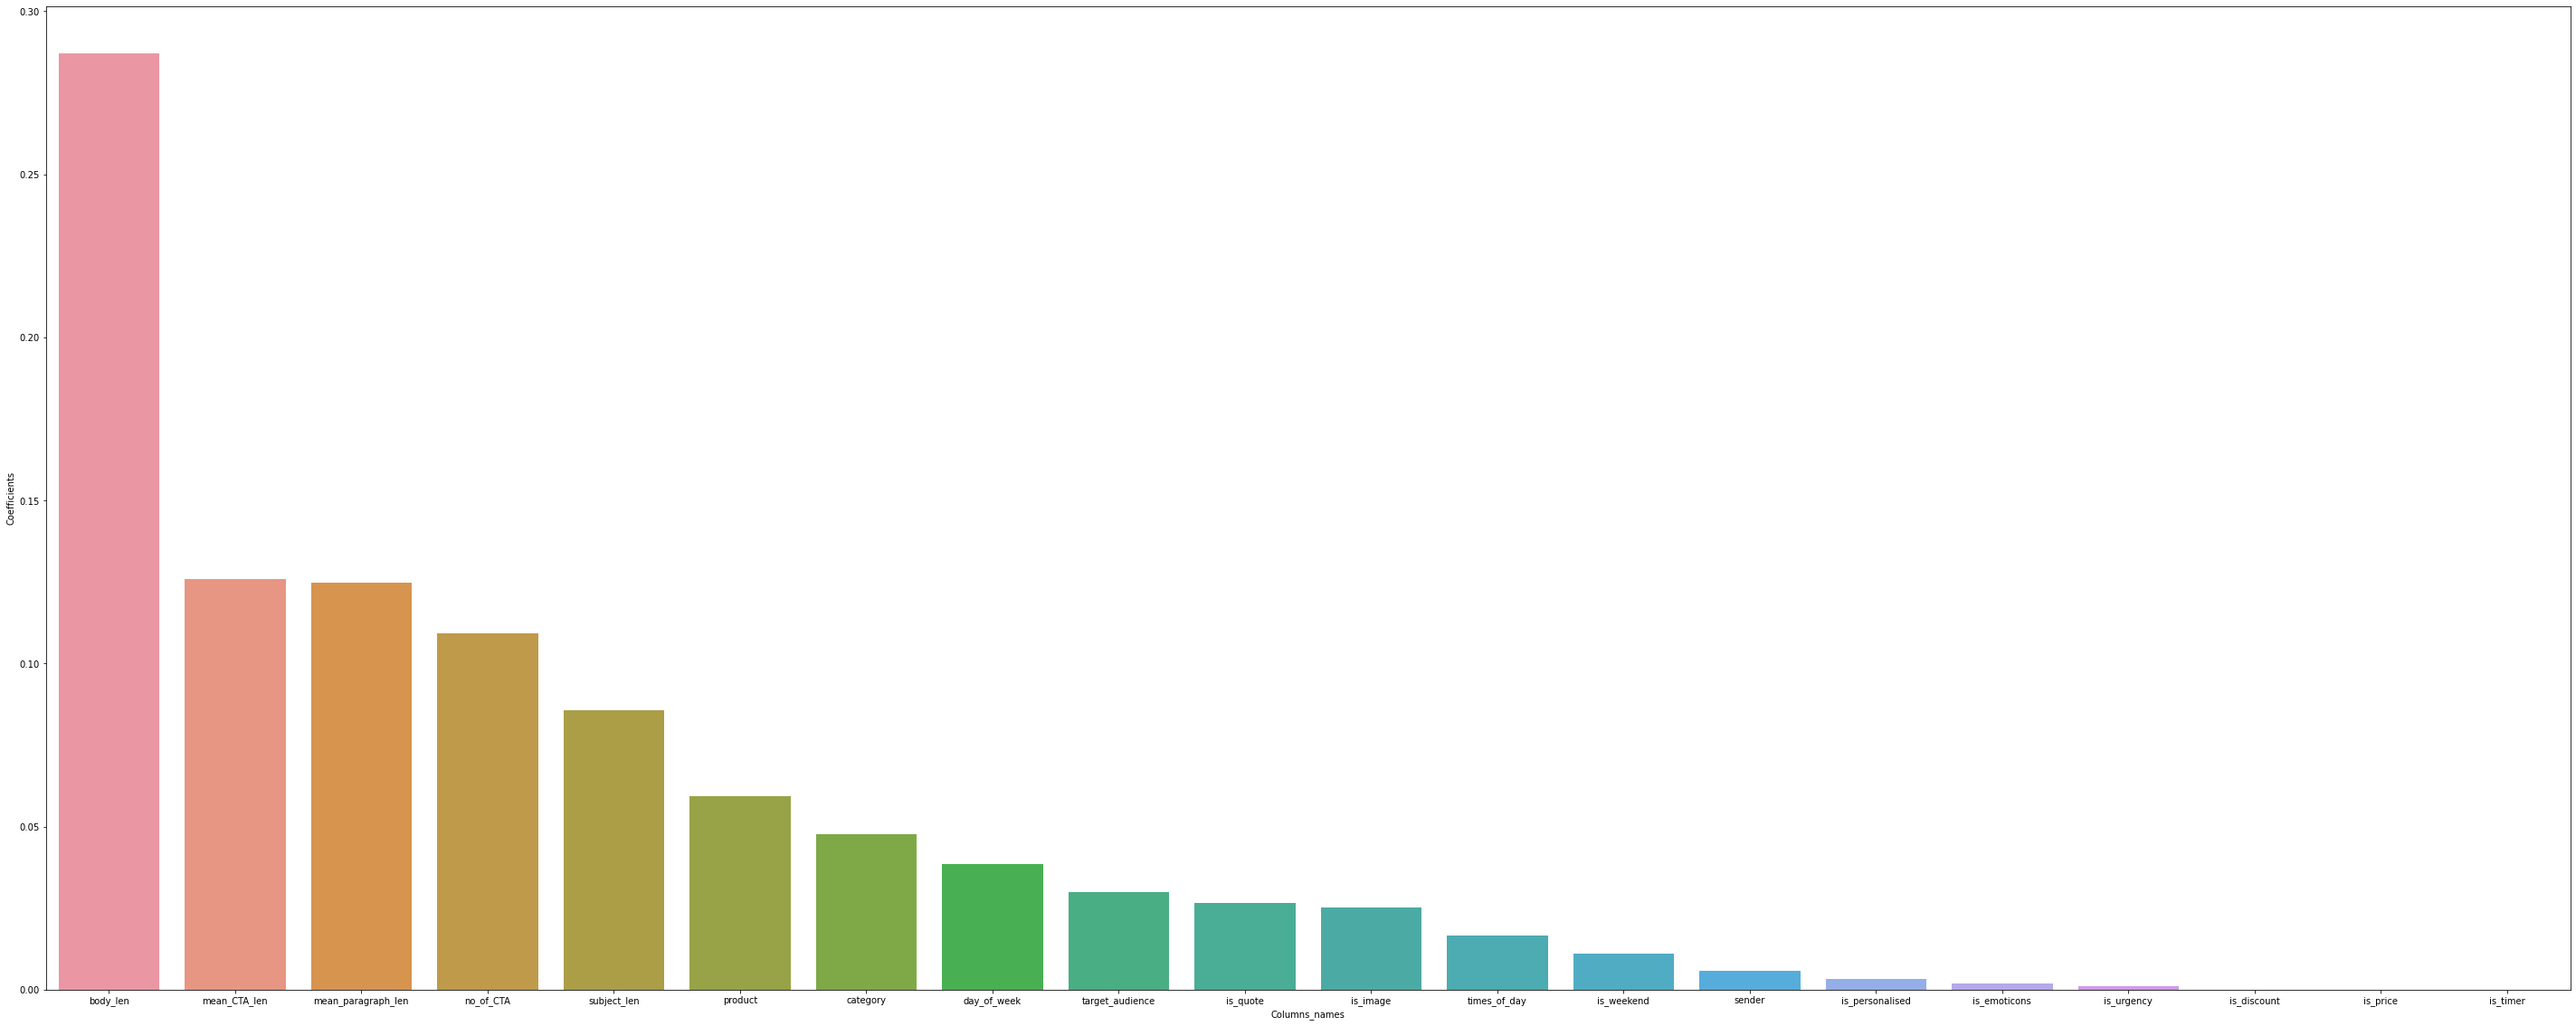

In [431]:
plt.figure(figsize=(50,20))
sns.barplot(Res["Columns_names"],Res["Coefficients"])

__Taking the imporatnt features into Consideartion to improve the performance of the model__

In [432]:
Important_features = Res["Columns_names"].values[:7]
Important_features

array(['body_len', 'mean_CTA_len', 'mean_paragraph_len', 'no_of_CTA',
       'subject_len', 'product', 'category'], dtype=object)

__The 7 Most Imporatant Features are 'body_len', 'mean_CTA_len', 'mean_paragraph_len', 'no_of_CTA',
       'subject_len', 'product', 'category'__

In [433]:
# Taking the Important_features
X_train = X_train[Important_features]
X_valid  = X_valid[Important_features]
test = test[Important_features]

__Again Predict the data with Important_features__

In [434]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_valid)
y_pred[:10]

array([0.01425508, 0.0881972 , 0.10446022, 0.04337247, 0.05366772,
       0.09037012, 0.03148388, 0.02490928, 0.00643242, 0.0139697 ])

In [435]:
np.array(y_valid[:10])

array([0.00331748, 0.05      , 0.01044725, 0.03008299, 0.0306982 ,
       0.12714509, 0.05253623, 0.01784636, 0.00793437, 0.02240041])

In [436]:
# Predicting through R2_Score
metrics.r2_score(y_valid,y_pred)

0.5366821186614554

### Step 9: Submission

In [380]:
submission = pd.read_csv('sample_submission_LJ2N3ZQ.csv')
reg.fit(X_train, y_train)
final_predictions = reg.predict(test)
submission['click_rate'] = final_predictions
#only positive predictions for the target variable
submission['click_rate'] = submission['click_rate'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

#                   Thank You